In [1]:
import pandas as pd

In [4]:
fashion_mnist_df = pd.read_csv('/content/drive/MyDrive/CMPE_255_DataPrep/Task4/fashion-mnist_train.csv')

In [5]:
fashion_mnist_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Check for missing values in the dataset
missing_values = fashion_mnist_df.isnull().sum().sum()

missing_values


0

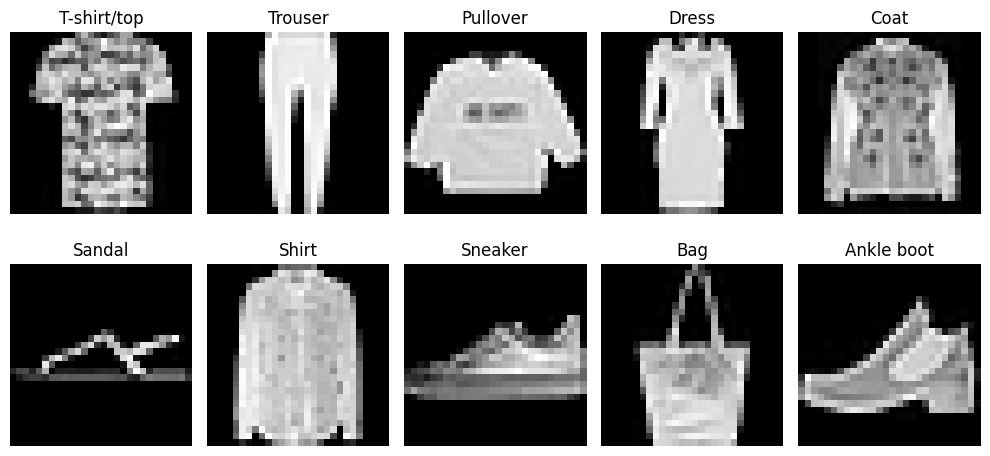

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class names for Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Sample a few images from different classes
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.ravel()):
    sample_image = fashion_mnist_df[fashion_mnist_df['label'] == i].iloc[0, 1:].values
    ax.imshow(sample_image.reshape(28, 28), cmap='gray')
    ax.set_title(class_names[i])
    ax.axis('off')

plt.tight_layout()
plt.show()


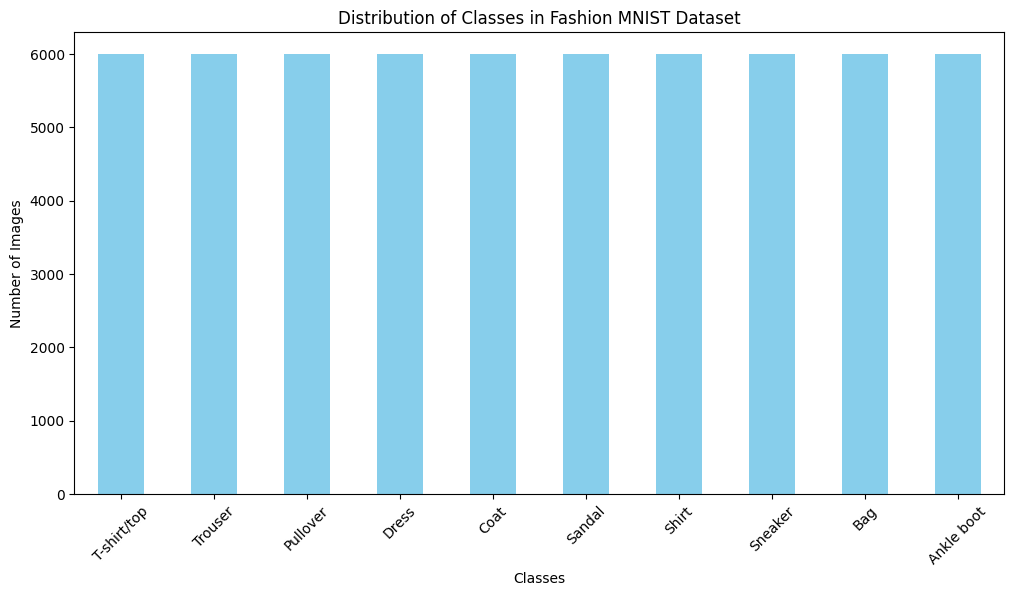

In [8]:
# Check the distribution of the classes
class_distribution = fashion_mnist_df['label'].value_counts(sort=False)

# Plot the distribution
plt.figure(figsize=(12, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.title("Distribution of Classes in Fashion MNIST Dataset")
plt.ylabel("Number of Images")
plt.xlabel("Classes")
plt.show()


In [9]:
# Check basic statistics of pixel values
pixel_stats = fashion_mnist_df.iloc[:, 1:].describe()

# Display statistics for a few selected pixels for brevity
pixel_stats.iloc[:, [0, 100, 200, 300, 400, 500, 600, 700]].round(2)


,pixel1,pixel101,pixel201,pixel301,pixel401,pixel501,pixel601,pixel701
count,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00,60000.00
mean,0.00,106.43,27.57,119.50,104.78,72.74,141.35,0.97
std,0.09,92.39,62.47,93.45,89.68,87.48,84.12,9.57
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,72.00,0.00
50%,0.00,114.00,0.00,141.00,107.00,6.00,169.00,0.00
75%,0.00,198.00,0.00,208.00,190.00,159.00,214.00,0.00
max,16.00,255.00,255.00,255.00,255.00,255.00,255.00,227.00


In [10]:
from sklearn.model_selection import train_test_split

# Separate labels and features
labels = fashion_mnist_df['label']
features = fashion_mnist_df.drop(columns=['label'])

# Normalize pixel values
normalized_features = features / 255.0

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((48000, 784), (12000, 784))

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,     # randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False)   # do not randomly flip images vertically

# Fit the augmenter to the data
# Convert the DataFrame to a numpy array and reshape
X_train_reshaped = X_train.to_numpy().reshape(-1, 28, 28, 1)

# Fit the augmenter to the reshaped data
datagen.fit(X_train_reshaped)


In [16]:
import numpy as np
from skimage.transform import resize

def resize_images(data):
    resized_data = np.zeros((data.shape[0], 32, 32, 1))
    for i in range(data.shape[0]):
        resized_data[i] = resize(data[i], (32, 32, 1))
    return resized_data

X_train_resized = resize_images(X_train_reshaped)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [20]:
!pip install sweetviz
import sweetviz as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 39.3 MB/s eta 0:00:00


In [24]:
report = sv.analyze(fashion_mnist_df, pairwise_analysis='off')
report.show_html('/content/drive/MyDrive/CMPE_255_DataPrep/Task4/sweetviz_report.html', open_browser=True, layout='widescreen', scale=1.0)

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/CMPE_255_DataPrep/Task4/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 257.2/257.4 MB 1.3 MB/s eta 0:00:01

In [ ]:
import h2o
h2o.init()


In [ ]:
h2o_data = h2o.H2OFrame(fashion_mnist_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [1]:
y = "label"
x = h2o_data.columns
x.remove(y)


NameError: ignored

In [ ]:
from h2o.automl import H2OAutoML

automl = H2OAutoML(max_models=5, seed=1, max_runtime_secs=500)
automl.train(x=x, y=y, training_frame=h2o_data)

AutoML progress: |
10:21:06.680: _train param, Dropping bad and constant columns: [id]

███████████
10:22:27.600: _train param, Dropping bad and constant columns: [id]

█
10:22:31.368: _train param, Dropping bad and constant columns: [id]

█
10:22:43.731: _train param, Dropping bad and constant columns: [id]

█████
10:23:26.425: _train param, Dropping bad and constant columns: [id]

████████
10:24:30.416: _train param, Dropping unused columns: [id]

██
10:24:41.691: _train param, Dropping unused columns: [id]

███████████████████████████████████| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),0/5
# GBM base models (used / total),0/1
# XGBoost base models (used / total),0/2
# GLM base models (used / total),0/1
# DRF base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


In [ ]:
lb = automl.leaderboard
print(lb.head())

# Best model
ensemble_model = automl.leader


model_id                                                    rmse      mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231029_102103     16.4107  269.312  14.2063  0.68642                    269.312
StackedEnsemble_BestOfFamily_1_AutoML_1_20231029_102103  16.4107  269.312  14.2063  0.68642                    269.312
GLM_1_AutoML_1_20231029_102103                           16.4108  269.315  14.2064  0.686566                   269.315
GBM_1_AutoML_1_20231029_102103                           16.4124  269.367  14.2055  0.686564                   269.367
DRF_1_AutoML_1_20231029_102103                           16.4303  269.956  14.217   0.68683                    269.956
XGBoost_2_AutoML_1_20231029_102103                       16.5136  272.698  14.2581  0.688483                   272.698
XGBoost_1_AutoML_1_20231029_102103                       16.7578  280.823  14.4018  0.693814                   280.823
[7 rows x 6 columns]



In [ ]:
h2o.cluster().shutdown()


H2O session _sid_bebf closed.
